In [47]:
import numpy as np
import pandas as pd
import time
import random
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

trainDataFilePath = "ExcerciseData\\real_project_data.xls";
# Read the data
print("Reading the data from the xls file")

xl = pd.ExcelFile(trainDataFilePath)

Reading the data from the xls file


In [48]:
xl.sheet_names

['Sheet1', 'Sheet2', 'Sheet3']

In [49]:
parsed = xl.parse("Sheet1")

In [50]:
data = np.array(parsed)

In [51]:
data.shape

(399, 21)

In [52]:

rows, cols = data.shape

# Classification is in the last column
Y = data[:, cols - 1]
X = data[:, :cols - 1]


In [53]:
print("Selecting random indexes for train and test")
nonzero_y_indexes = np.where(Y == 'M')[0]
zero_y_indexes = np.where(Y == 'B')[0]

print("Got %d samples classified as 'M', an %d samples classified as 'B'" % (len(nonzero_y_indexes), len(zero_y_indexes)))

assert(len(nonzero_y_indexes) + len(zero_y_indexes) == len(Y))

Selecting random indexes for train and test
Got 172 samples classified as 'M', an 227 samples classified as 'B'


In [54]:
# get N random 'B' classified samples indexes while N is the length of the 'M' classified samples (to make the amount of 'B' samples equal to the amount of the 'M' samples)
random_x_train_indexes = np.random.choice(zero_y_indexes, len(nonzero_y_indexes))

train_indexes = np.append(random_x_train_indexes, nonzero_y_indexes)
x_train = X[train_indexes, :]
y_train = Y[train_indexes]

number_of_test_indexes = 300
test_indexes = np.random.choice(range(rows), number_of_test_indexes)
x_test, y_test = X[test_indexes, :], Y[test_indexes]
print("Training on %d samples, testing on %d new samples" % (len(train_indexes), number_of_test_indexes))



Training on 344 samples, testing on 300 new samples


Getting the 3 most influencing features using PCA
Shape before PCA is  (399, 20)
Shape after transpose is  (20, 399)
Explained Variance: [  9.98396743e-01   1.20415286e-03   3.80665504e-04]
[[ 0.07562355  0.06929569  0.03217766 ...,  0.02872473  0.02138615
   0.02441326]
 [-0.01970319  0.01241472 -0.01382446 ..., -0.03505353 -0.04771608
  -0.03572722]
 [-0.09948971 -0.0286115   0.06898575 ...,  0.04511254  0.04074513
   0.04938119]]
New shape is  (399, 3)


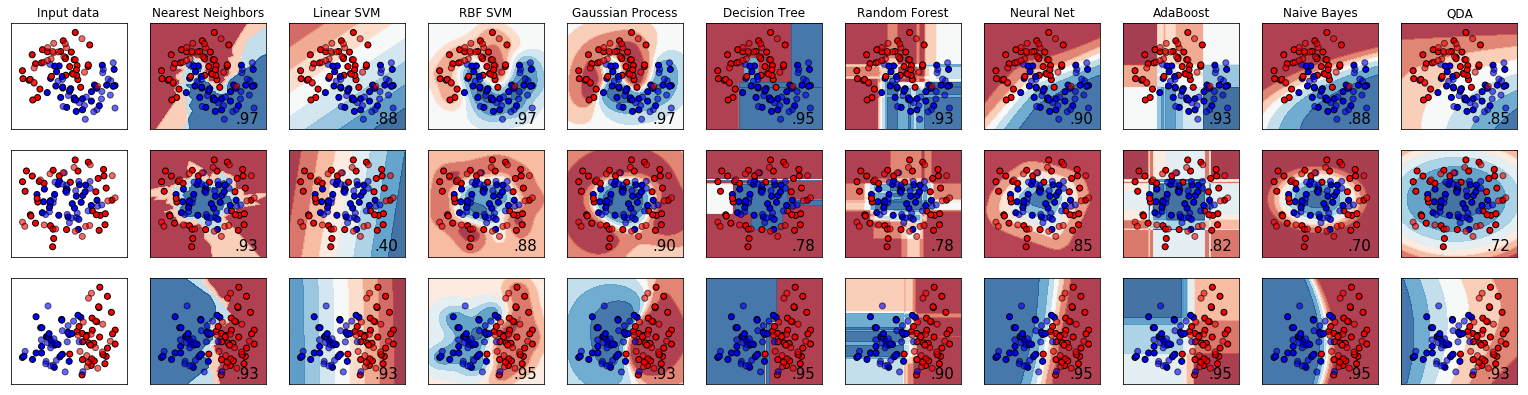

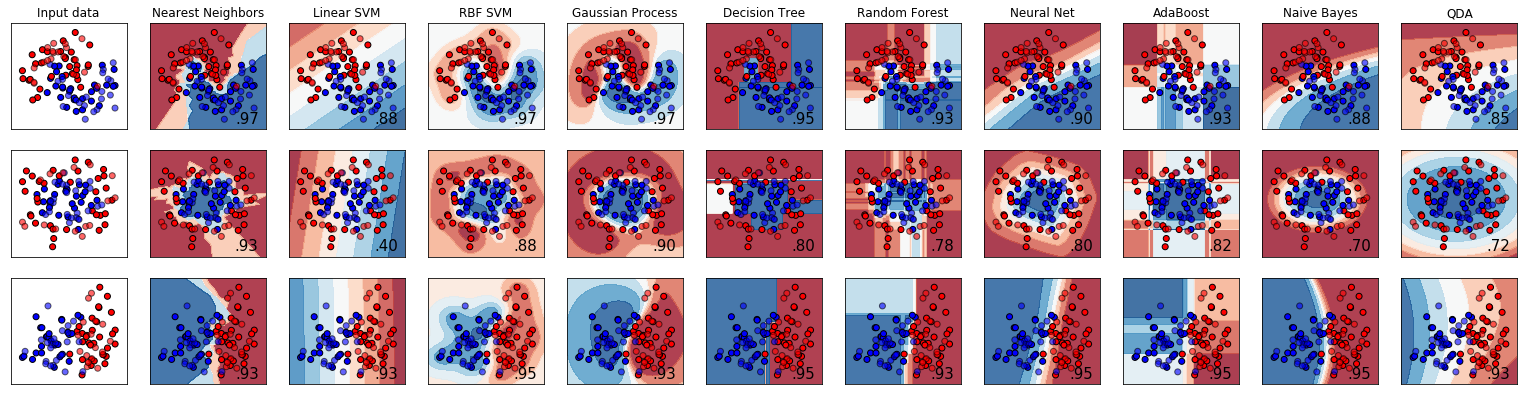

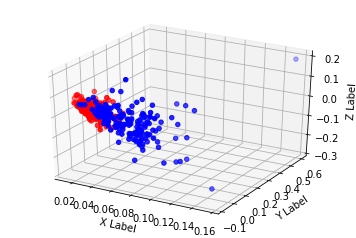

In [55]:
def plot_3d(X1_train, X2_train):
    fig = pl.figure()
    ax = fig.add_subplot(111, projection='3d')

    n = 100

    ax.scatter(X2_train[:, 0], X2_train[:, 1], X2_train[:, 2], c="r", marker="o")
    ax.scatter(X1_train[:, 0], X1_train[:, 1], X1_train[:, 2], c="b", marker="o")

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    pl.axis("tight")
    pl.show()


def draw_data_3d(X_set, y):
    print("Getting the 3 most influencing features using PCA")
    Xt = np.transpose(X_set)
    print("Shape before PCA is ", X_set.shape)
    print("Shape after transpose is ", Xt.shape)
    pca = PCA(n_components=3)
    fit = pca.fit(Xt)
    # summarize components
    print("Explained Variance: %s" % fit.explained_variance_ratio_)
    print(fit.components_)
    X_decomposed = np.transpose(fit.components_)
    print("New shape is ", X_decomposed.shape)

    plot_3d(X_decomposed[y == 'M'], X_decomposed[y == 'B'])

# Plot the data on 3d in order to visualize how it's distributes
draw_data_3d(X, Y)

In [56]:
def get_trained_svm(ker, c, x_train, y_train):
    start = time.time()
    print("Starting train for SVM with %s kernel and %.3f as the penalty parameter" % (ker, c))
    clf = svm.SVC(kernel=ker, C=c, degree=2)
    clf.fit(x_train, y_train)
    print("Time for SVM train: %.3f seconds" % (time.time() - start))
    return clf


def test_svm(clf, x_test, y_test):
    start = time.time()
    print("Starting test")
    y_predict = clf.predict(x_test)
    correct = np.sum(y_predict == y_test)
    print("%d out of %d predictions correct - sucess rate: %.2f %%" % (
    correct, len(y_predict), (correct / len(y_predict)) * 100))
    print("Time for SVM test: %.3f seconds" % (time.time() - start))


def run_svm_e2e(x_train, y_train, x_test, y_test, kernel="rbf", C=1.0):
    start = time.time()
    clf = get_trained_svm(kernel, C, x_train, y_train)
    test_svm(clf, x_test, y_test)
    print("Total time is: %.3f seconds" % (time.time() - start))


    
###############################################################################
########                        SKLEARN SVM                            ########
###############################################################################

"""
Test sklearn's SVM with 'linear' kernel
"""
print("\n***\tTest sklearn's SVM with 'linear' kernel\t***\n")
run_svm_e2e(x_train, y_train, x_test, y_test, "linear", 0.1)
print("\n****************************\n")
run_svm_e2e(x_train, y_train, x_test, y_test, "linear", 1.0)
print("\n****************************\n")
run_svm_e2e(x_train, y_train, x_test, y_test, "linear", 5)

"""
Test sklearn's SVM with 'gaussian' kernel
"""
print("\n***\tTest sklearn's SVM with 'gaussian' kernel\t***\n")
run_svm_e2e(x_train, y_train, x_test, y_test, "rbf", 0.1)
print("\n****************************\n")
run_svm_e2e(x_train, y_train, x_test, y_test, "rbf", 1.0)
print("\n****************************\n")
run_svm_e2e(x_train, y_train, x_test, y_test, "rbf", 5)

"""
Test sklearn's SVM with 'sigmoid' kernel
"""
print("\n***\tTest sklearn's SVM with 'sigmoid' kernel\t***\n")
run_svm_e2e(x_train, y_train, x_test, y_test, "sigmoid", 0.1)
print("\n****************************\n")
run_svm_e2e(x_train, y_train, x_test, y_test, "sigmoid", 1.0)
print("\n****************************\n")
run_svm_e2e(x_train, y_train, x_test, y_test, "sigmoid", 5)


***	Test sklearn's SVM with 'linear' kernel	***

Starting train for SVM with linear kernel and 0.100 as the penalty parameter
Time for SVM train: 0.320 seconds
Starting test
273 out of 300 predictions correct - sucess rate: 91.00 %
Time for SVM test: 0.001 seconds
Total time is: 0.321 seconds

****************************

Starting train for SVM with linear kernel and 1.000 as the penalty parameter
Time for SVM train: 0.911 seconds
Starting test
271 out of 300 predictions correct - sucess rate: 90.33 %
Time for SVM test: 0.000 seconds
Total time is: 0.911 seconds

****************************

Starting train for SVM with linear kernel and 5.000 as the penalty parameter
Time for SVM train: 5.922 seconds
Starting test
268 out of 300 predictions correct - sucess rate: 89.33 %
Time for SVM test: 0.001 seconds
Total time is: 5.923 seconds

***	Test sklearn's SVM with 'gaussian' kernel	***

Starting train for SVM with rbf kernel and 0.100 as the penalty parameter
Time for SVM train: 0.009 s

In [57]:
def run_k_fold(m, X, Y):
    # k-fold cross validation
    # shuffle data
    index = [i for i in range(0, m)]
    random.shuffle(index)
    X = X[index, :]
    Y = Y[index]

    # k-fold
    kfold = 10
    foldSize = int(m / kfold)

    # arrage to store training and testing error
    trainErr = [0.0] * kfold
    testErr = [0.0] * kfold
    allIndex = range(0, m)
    for k in range(0, kfold):

        test_indexes = range((foldSize * k), foldSize * (k + 1))
        train_indexes = list(set(allIndex) - set(test_indexes))

        train_x, train_y = X[train_indexes, :], Y[train_indexes]
        test_x, test_y = X[test_indexes, :], Y[test_indexes]
        print("\n****************************\n")
        run_svm_e2e(train_x, train_y, test_x, test_y, "linear", 1.0)
        print("\n****************************\n")

        
run_k_fold(len(Y), X, Y)


****************************

Starting train for SVM with linear kernel and 1.000 as the penalty parameter
Time for SVM train: 1.223 seconds
Starting test
39 out of 39 predictions correct - sucess rate: 100.00 %
Time for SVM test: 0.001 seconds
Total time is: 1.224 seconds

****************************


****************************

Starting train for SVM with linear kernel and 1.000 as the penalty parameter
Time for SVM train: 1.681 seconds
Starting test
37 out of 39 predictions correct - sucess rate: 94.87 %
Time for SVM test: 0.001 seconds
Total time is: 1.682 seconds

****************************


****************************

Starting train for SVM with linear kernel and 1.000 as the penalty parameter
Time for SVM train: 1.202 seconds
Starting test
38 out of 39 predictions correct - sucess rate: 97.44 %
Time for SVM test: 0.000 seconds
Total time is: 1.202 seconds

****************************


****************************

Starting train for SVM with linear kernel and 1.000 a


Classifier comparison
A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.
Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.
The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.

<class 'tuple'>
(100, 2)
(100,)
<class 'tuple'>
(100, 2)
(100,)
<class 'tuple'>
(100, 2)
(100,)
Running with classifier: Nearest Neighbors
Running with classifier: Linear SVM
Running with classifier: RBF SVM
Running with classifier: Gaussian Process
Running with classifier: Deci

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Running with classifier: AdaBoost
Running with classifier: Naive Bayes
Running with classifier: QDA
Running with classifier: Nearest Neighbors
Running with classifier: Linear SVM
Running with classifier: RBF SVM
Running with classifier: Gaussian Process
Running with classifier: Decision Tree
Running with classifier: Random Forest
Running with classifier: Neural Net


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Running with classifier: AdaBoost
Running with classifier: Naive Bayes
Running with classifier: QDA
Running with classifier: Nearest Neighbors
Running with classifier: Linear SVM
Running with classifier: RBF SVM
Running with classifier: Gaussian Process
Running with classifier: Decision Tree
Running with classifier: Random Forest
Running with classifier: Neural Net


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Running with classifier: AdaBoost
Running with classifier: Naive Bayes
Running with classifier: QDA


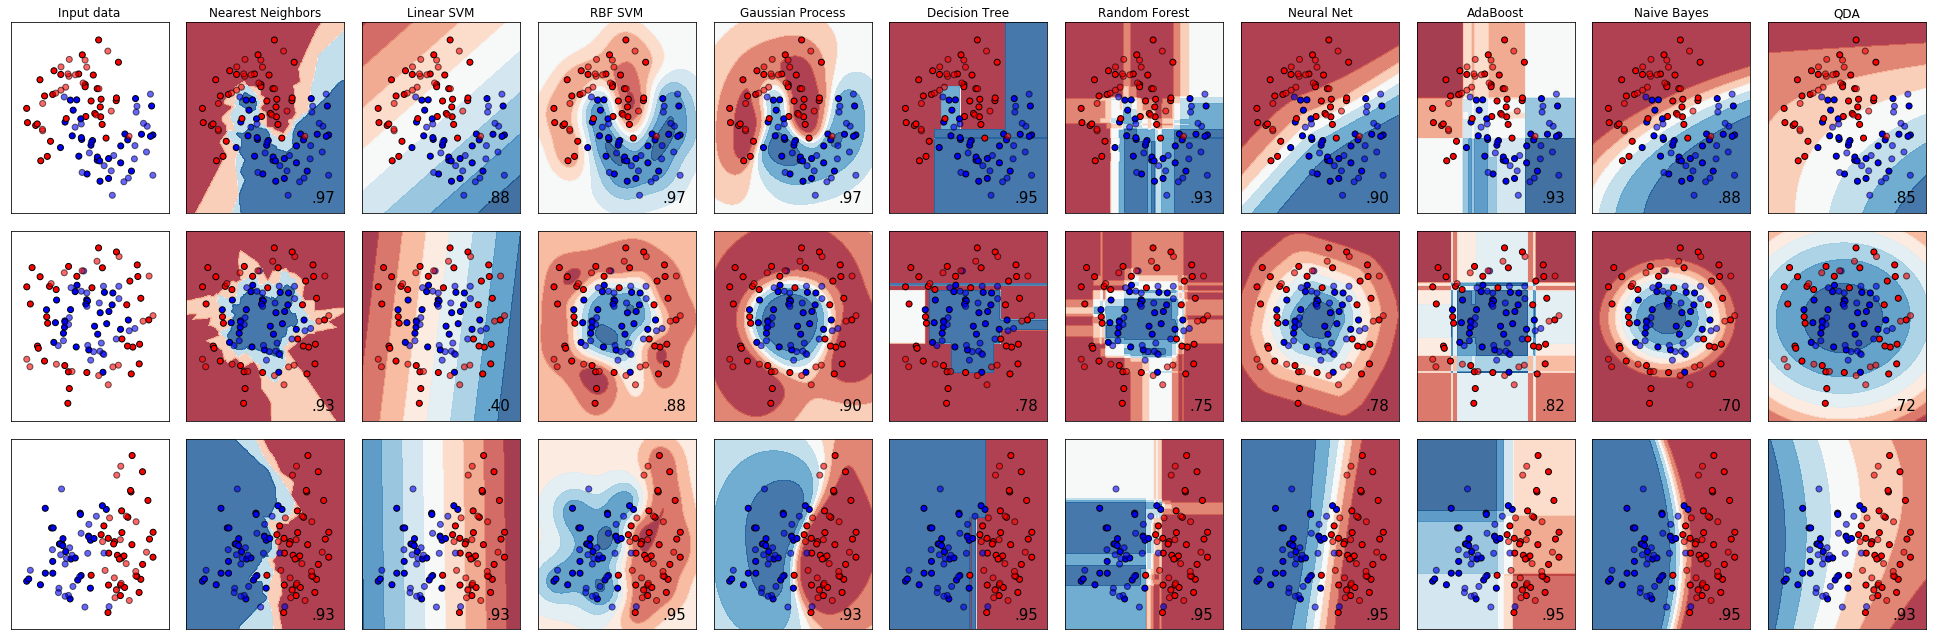

In [64]:
"""
=====================
Classifier comparison
=====================
A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.
Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.
The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.
"""
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
for ds in datasets:
    print(type(ds))
    print(ds[0].shape)
    print(ds[1].shape)
    
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        print("Running with classifier:", name)
        
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

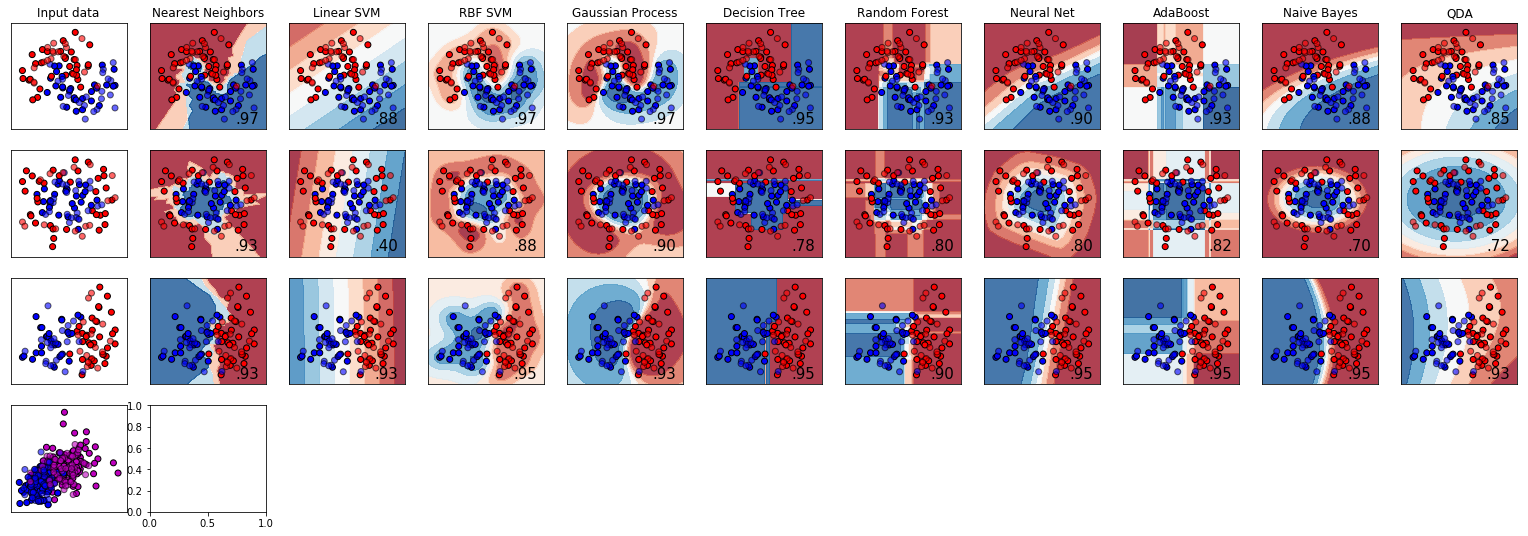

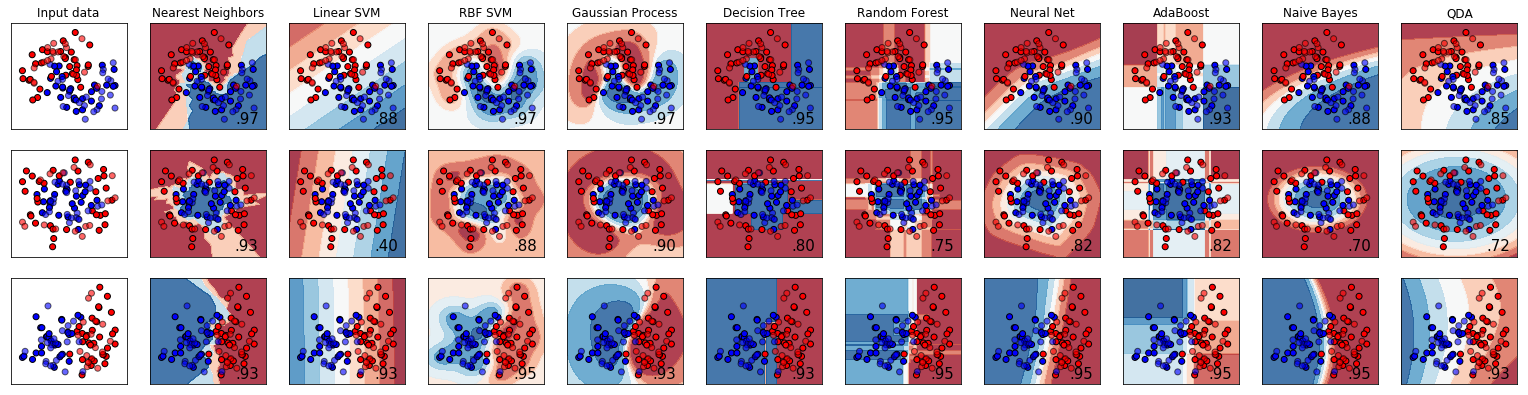

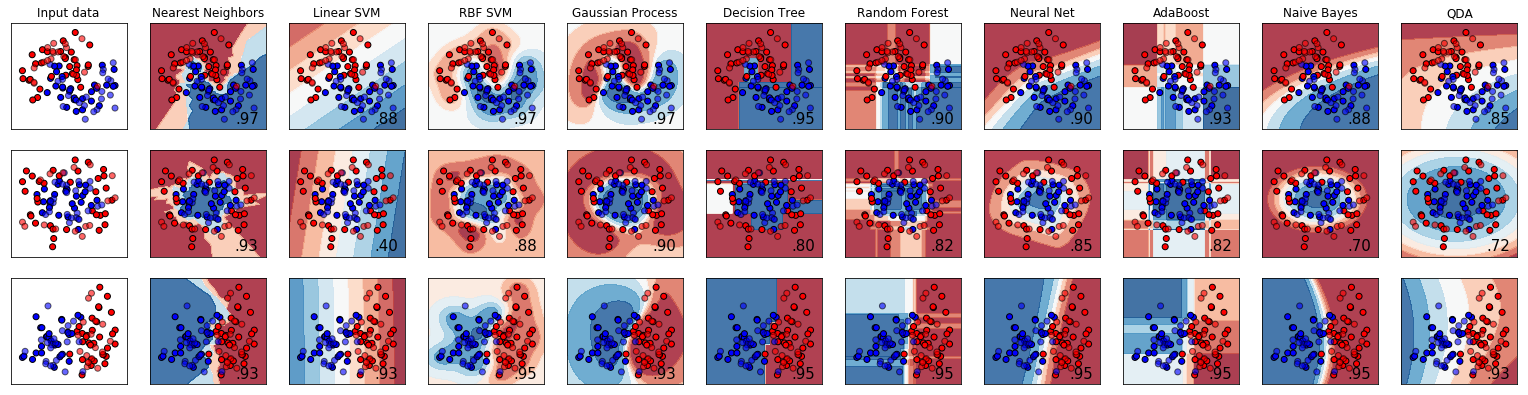

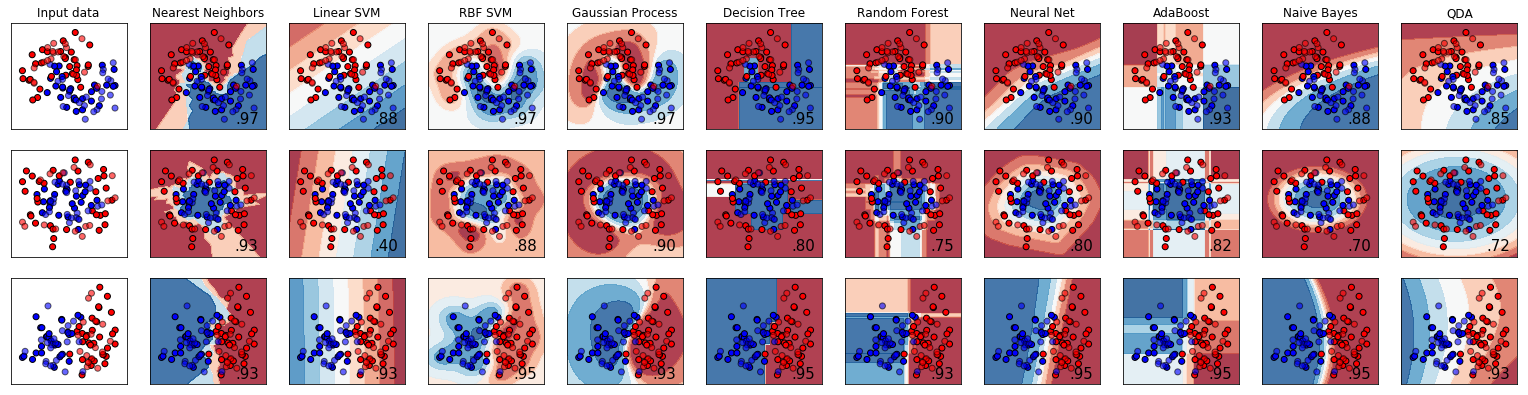

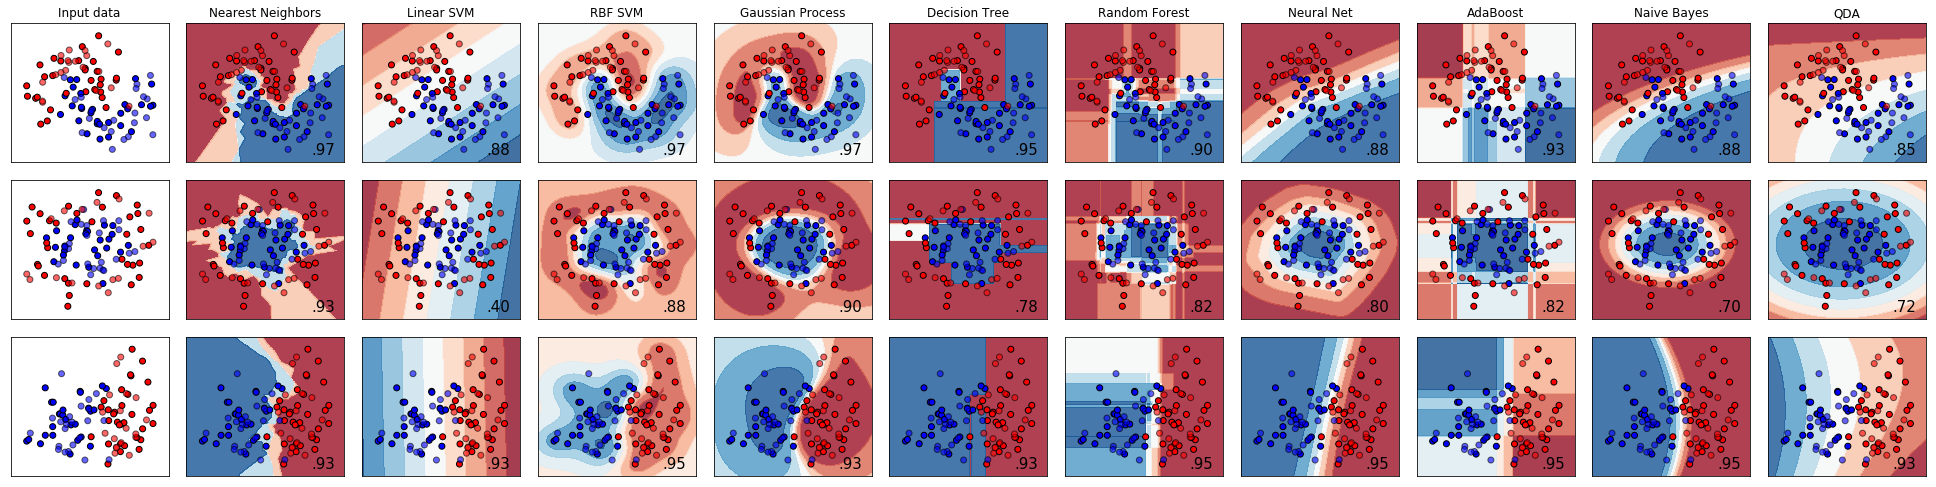

In [63]:
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


In [37]:
print(Running neural network algorithm)
mlp = MLPClassifier(hidden_layer_sizes=10, solver="sgd", max_iter=1000)

mlp.fit(x_train, y_train)

y_predict = mlp.predict(x_train)

print (mlp.score(x_test, y_test))

SyntaxError: invalid syntax (<ipython-input-37-7e6b24011553>, line 1)

In [ ]:
# Plot the data on 3d in order to visualize how it's distributes
draw_data_3d(X, Y)